In [98]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy as sp

# Import des données clients

In [99]:
# Import du fichier client 

datacustomers = pd.read_csv("customers.csv",sep=";")
datacustomers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


# Vérification des données clients

In [100]:
# Recherche des valeurs null

print(datacustomers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [101]:
# Recherche des doublons

datacustomers.loc[datacustomers['client_id'].duplicated(keep=False),:]

,client_id,sex,birth


In [102]:
# Vérification de la colonne client_id

datacustomers['client_id'].nunique()

8621

La colonne client_id est bien la clé primaire du dataframe datacustomers 

# Import des données produits

In [103]:
# Import du fichier produit

dataproducts = pd.read_csv("products.csv",sep=";")
dataproducts

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


# Vérification des données produits

In [104]:
# Infos du fichier produit

dataproducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [105]:
# Recherche des valeurs null

print(dataproducts.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


In [106]:
# Recherche des doublons
dataproducts.loc[dataproducts['id_prod'].duplicated(keep=False),:]

,id_prod,price,categ


In [107]:
# Vérification de la colonne id_prod
dataproducts['id_prod'].nunique()

3286

la colonne id_prod est bien notre colonne primaire. 

# Import des données de transactions 

In [108]:
# Import et première vu du fichier transaction

datatransactions = pd.read_csv("transactions.csv",sep=";")
datatransactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


# Vérification des données de transaction

In [109]:
# Info du DataFrame

datatransactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [110]:
# Recherche des valeurs null

print(datatransactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [111]:
# Recherche des doublons

datatransactions.loc[datatransactions[['session_id','id_prod','client_id', 'date']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id


# Merge des différents fichiers

In [112]:
# Jointure entre le dataframe dataproducts et datatransactions

datamerge1 = pd.merge(dataproducts, datatransactions, how="outer", on=["id_prod"])
datamerge1

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057
...,...,...,...,...,...,...
687550,1_140,38.56,1,2022-12-09 14:20:34.169187,s_309513,c_7406
687551,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088
687552,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748
687553,0_1920,25.16,0,2022-12-30 02:37:22.371278,s_319303,c_7748


In [113]:
# Recherche des valeurs null

print(datamerge1.isnull().sum())

id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
dtype: int64


In [114]:
# Supression des valeurs nulles puisque l'on arrive pas à retrouver les produits achetés

datamerge1.dropna(inplace = True)

In [115]:
# Vérification des valeurs null

print(datamerge1.isnull().sum())

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
dtype: int64


In [116]:
print(datamerge1.nunique())

id_prod         3265
price           1442
categ              3
date          687419
session_id    345505
client_id       8600
dtype: int64


In [117]:
# Jointure datamerge1 et datacustomers avec la colonne client_id

datamerge2 = pd.merge(datacustomers, datamerge1, how="outer", on=["client_id"])
datamerge2

,client_id,sex,birth,id_prod,price,categ,date,session_id
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967,1_385,25.99,1.0,2023-02-22 01:40:22.782925,s_345108
2,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
3,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
4,c_4410,f,1967,0_1111,19.99,0.0,2023-02-22 01:27:49.480137,s_345108
...,...,...,...,...,...,...,...,...
687550,c_84,f,1982,0_1438,9.31,0.0,2022-03-29 06:11:50.316631,s_186172
687551,c_84,f,1982,0_1438,9.31,0.0,2022-05-29 06:11:50.316631,s_215697
687552,c_84,f,1982,1_459,15.99,1.0,2022-02-17 00:16:56.629536,s_166337
687553,c_84,f,1982,1_459,15.99,1.0,2022-12-17 00:16:56.629536,s_313173


In [118]:
# Recherche des valeurs null

print(datamerge2.isnull().sum())

client_id      0
sex            0
birth          0
id_prod       21
price         21
categ         21
date          21
session_id    21
dtype: int64


In [119]:
# Recherche des lignes de valeurs nulles sur l'id_prod
datamerge2[datamerge2["id_prod"].isnull()]

,client_id,sex,birth,id_prod,price,categ,date,session_id
60134,c_8253,f,2001,NaN,NaN,NaN,NaN,NaN
202567,c_3789,f,1997,NaN,NaN,NaN,NaN,NaN
220670,c_4406,f,1998,NaN,NaN,NaN,NaN,NaN
222930,c_2706,f,1967,NaN,NaN,NaN,NaN,NaN
228157,c_3443,m,1959,NaN,NaN,NaN,NaN,NaN
251338,c_4447,m,1956,NaN,NaN,NaN,NaN,NaN
251898,c_3017,f,1992,NaN,NaN,NaN,NaN,NaN
264087,c_4086,f,1992,NaN,NaN,NaN,NaN,NaN
316669,c_6930,m,2004,NaN,NaN,NaN,NaN,NaN
323346,c_4358,m,1999,NaN,NaN,NaN,NaN,NaN


In [120]:
# Supression des valeurs nulles puisque nous voulons faire une analyse sur la clientèle

datamerge2.dropna(inplace = True)

In [121]:
# Vérification des valeurs null

print(datamerge2.isnull().sum())

client_id     0
sex           0
birth         0
id_prod       0
price         0
categ         0
date          0
session_id    0
dtype: int64


In [122]:
datamerge2.describe

<bound method NDFrame.describe of        client_id sex  birth id_prod  price  categ                        date  \
0         c_4410   f   1967   1_385  25.99    1.0  2021-03-22 01:40:22.782925   
1         c_4410   f   1967   1_385  25.99    1.0  2023-02-22 01:40:22.782925   
2         c_4410   f   1967  0_1110   4.71    0.0  2021-11-04 16:28:30.169021   
3         c_4410   f   1967  0_1111  19.99    0.0  2021-03-22 01:27:49.480137   
4         c_4410   f   1967  0_1111  19.99    0.0  2023-02-22 01:27:49.480137   
...          ...  ..    ...     ...    ...    ...                         ...   
687550      c_84   f   1982  0_1438   9.31    0.0  2022-03-29 06:11:50.316631   
687551      c_84   f   1982  0_1438   9.31    0.0  2022-05-29 06:11:50.316631   
687552      c_84   f   1982   1_459  15.99    1.0  2022-02-17 00:16:56.629536   
687553      c_84   f   1982   1_459  15.99    1.0  2022-12-17 00:16:56.629536   
687554      c_84   f   1982   1_110  54.90    1.0  2021-09-13 21:39:46.8453

In [123]:
datamerge2['date_str'] = datamerge2['date'].str[:10]

In [124]:
datamerge2['date_str']

0         2021-03-22
1         2023-02-22
2         2021-11-04
3         2021-03-22
4         2023-02-22
             ...    
687550    2022-03-29
687551    2022-05-29
687552    2022-02-17
687553    2022-12-17
687554    2021-09-13
Name: date_str, Length: 687534, dtype: object

In [125]:
datamerge2['date_fmt'] = pd.to_datetime(datamerge2['date_str'])

In [126]:
datamerge2.dtypes

client_id             object
sex                   object
birth                  int64
id_prod               object
price                float64
categ                float64
date                  object
session_id            object
date_str              object
date_fmt      datetime64[ns]
dtype: object

In [127]:
annee_actuelle= datetime.now().year

In [128]:
annee_actuelle

2024

In [129]:
# Ajout de la colonne âge 
datamerge2['age']= annee_actuelle - datamerge2['birth']

In [130]:
datamerge2[["age","birth"]].head()

,age,birth
0,57,1967
1,57,1967
2,57,1967
3,57,1967
4,57,1967


# Demande d'Antoine 

Analyse du CA

## Chiffre d'affaires par produits  


In [131]:
# Regroupement par id_produit et ensuite calcul de la somme des prix pour chaque groupe.
chiffre_affaire_par_produit = datamerge2.groupby('id_prod')['price'].sum().reset_index()

In [132]:
# Renommer les colonnes pour plus de clarté
chiffre_affaire_par_produit.columns = ['id_produit', 'chiffre_affaire']

print(chiffre_affaire_par_produit)

     id_produit  chiffre_affaire
0           0_0          4657.50
1           0_1          5352.13
2          0_10           394.90
3         0_100            61.80
4        0_1000          2954.88
...         ...              ...
3260       2_95           395.96
3261       2_96         28650.18
3262       2_97          2092.87
3263       2_98           149.74
3264       2_99           594.93

[3265 rows x 2 columns]


## Chiffre d'affaire total 


In [133]:
# Chiffre total = somme de tous les chiffres d'affaires par produits 
CA = round(datamerge2['price'].sum(),2)
print("Chiffre d'affaire total :", CA, "€")

Chiffre d'affaire total : 12027663.1 €


In [134]:
# Périmètre d'étude
datamerge2['date_fmt'].min()

Timestamp('2021-03-01 00:00:00')

In [135]:
datamerge2['date_fmt'].max()

Timestamp('2023-02-28 00:00:00')

Le chiffre d'affaire sur la période du 1er mars 2021 à 2023 est de  12027663.1 €

In [136]:
datamerge2.head()

,client_id,sex,birth,id_prod,price,categ,date,session_id,date_str,date_fmt,age
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,2021-03-22,2021-03-22,57
1,c_4410,f,1967,1_385,25.99,1.0,2023-02-22 01:40:22.782925,s_345108,2023-02-22,2023-02-22,57
2,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,2021-11-04,2021-11-04,57
3,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,2021-03-22,2021-03-22,57
4,c_4410,f,1967,0_1111,19.99,0.0,2023-02-22 01:27:49.480137,s_345108,2023-02-22,2023-02-22,57


## Chiffre d'affaire dans le temps

In [137]:
# Chiffre d'affaire dans le temps groupé par date
CAtemp = datamerge2.groupby(by=['date_fmt'])['price'].sum().reset_index()

In [138]:
# Renommage de la colonne prix par CA
CAtemp = CAtemp.rename(columns={'price':'CA'})

In [139]:
evol_CA = CAtemp.set_index('date_fmt')
evol_CA.index = pd.to_datetime(evol_CA.index)
evol_CA

,CA
date_fmt,
2021-03-01,16565.22
2021-03-02,15486.45
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37
...,...
2023-02-24,15207.89
2023-02-25,15761.25
2023-02-26,16304.72


In [140]:
CAtemp

,date_fmt,CA
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


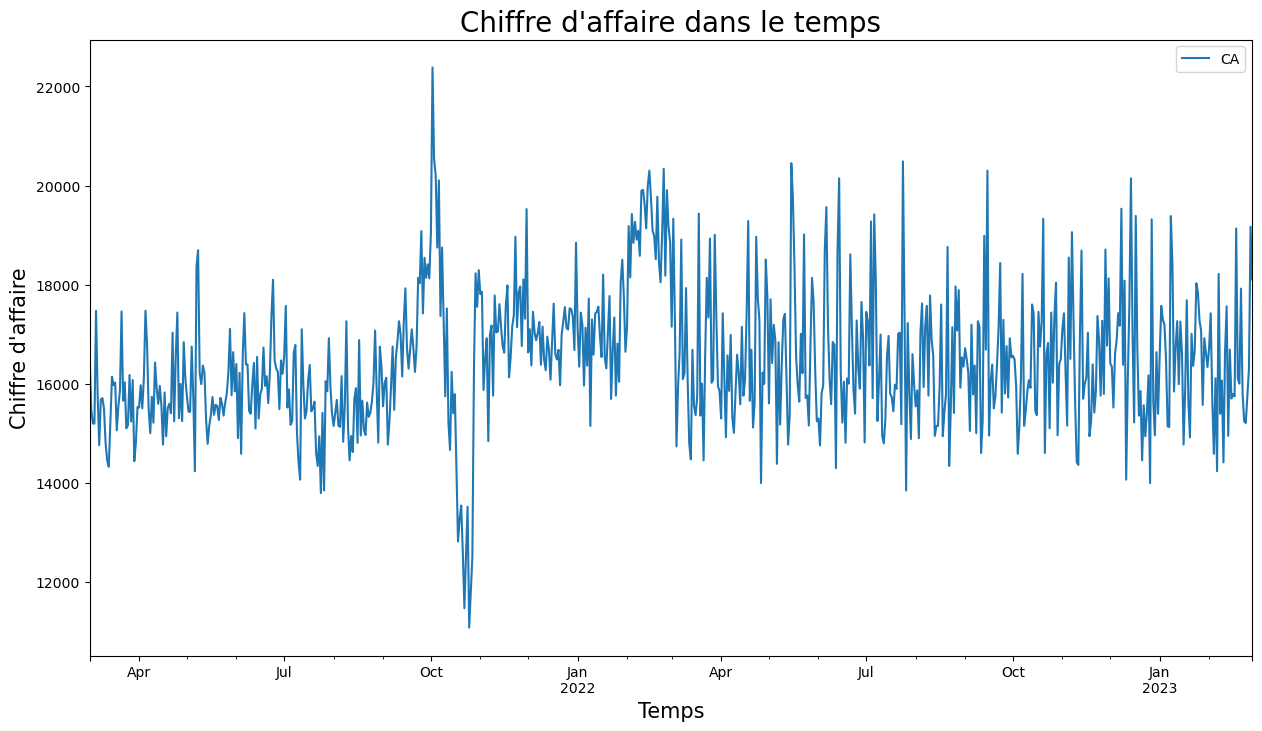

In [141]:
# Graphique
CAtemp.plot.line(y='CA', x = 'date_fmt',figsize=(15, 8))
plt.title("Chiffre d'affaire dans le temps", size = 20)
plt.ylabel("Chiffre d'affaire", fontsize= 15)
plt.xlabel("Temps", fontsize= 15)
plt.show()

In [142]:
#Nous remarquons une baisse du CA en octobre ; pourquoi ?
#Baisse du CA en octobre

CAoctobre = datamerge2.loc[(datamerge2.date_fmt>='2021-10-01')&(datamerge2.date_fmt<='2021-10-31'), ['price','categ','date_fmt']]
CAoctobre

,price,categ,date_fmt
18,8.11,0.0,2021-10-01
40,5.99,0.0,2021-10-21
63,5.99,0.0,2021-10-14
108,13.99,1.0,2021-10-24
142,16.99,0.0,2021-10-04
...,...,...,...
687534,6.99,0.0,2021-10-21
687543,17.99,0.0,2021-10-01
687544,9.71,0.0,2021-10-21
687546,5.99,0.0,2021-10-21


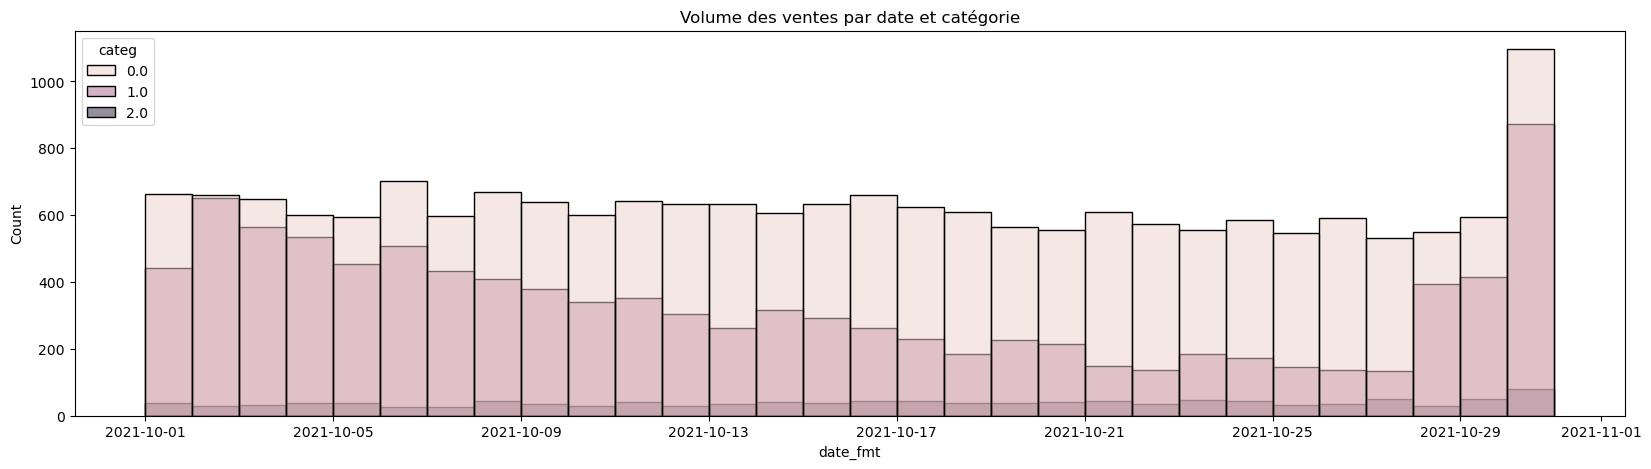

In [143]:
#Visualisation autour du C.A
#Volume des ventes par date et catégorie

plt.figure(figsize=(20,5
                   ))
#sns.histplot(data=CAoctobre, x='date_fmt', hue='categ', palette=["#d73501", "#004623", "#aa00ff"])
sns.histplot(data=CAoctobre, x='date_fmt', hue='categ',)
plt.title('Volume des ventes par date et catégorie')
plt.show()

observations : La catégorie 1 a fait moins de ventes au mois d'octobre.La catégorie 0 s'est pas mal vendue aussi. Peut-être un bug dans le site en ligne qui venait d'être lancé. 

In [144]:
CAnovembre = datamerge2.loc[(datamerge2.date_fmt>='2021-11-01')&(datamerge2.date_fmt<='2021-11-30'), ['price','categ','date_fmt']]
CAnovembre

,price,categ,date_fmt
2,4.71,0.0,2021-11-04
9,14.53,1.0,2021-11-12
80,25.99,1.0,2021-11-15
101,4.99,0.0,2021-11-09
106,12.99,0.0,2021-11-15
...,...,...,...
687345,9.64,0.0,2021-11-15
687352,20.99,1.0,2021-11-25
687377,10.00,0.0,2021-11-02
687448,19.44,1.0,2021-11-07


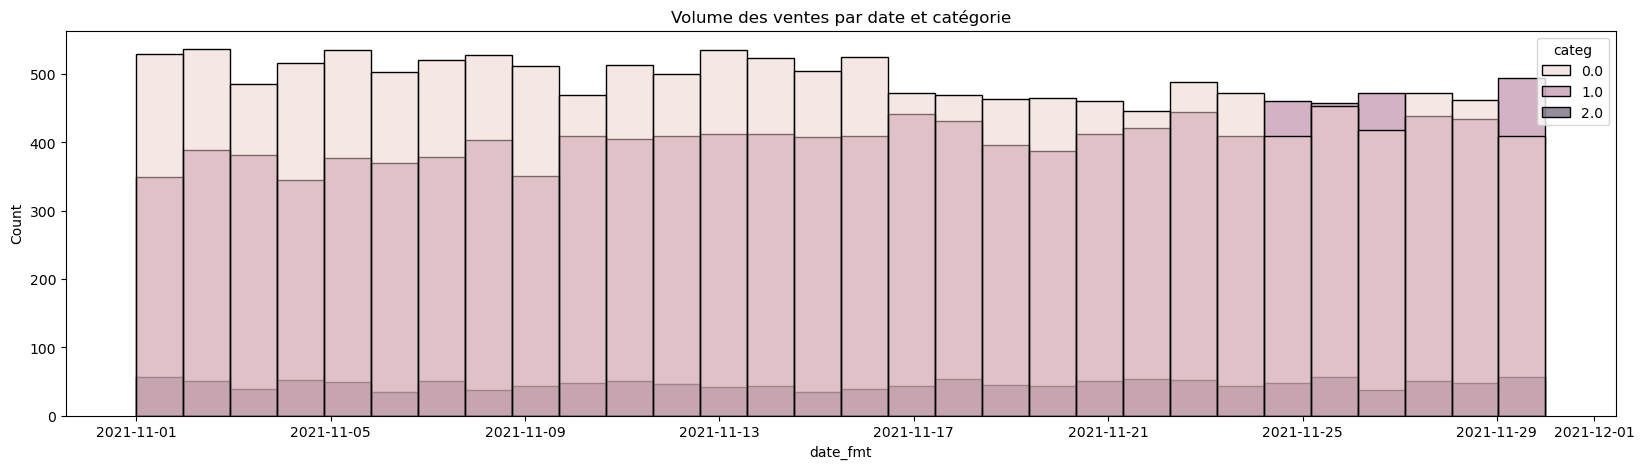

In [145]:
#Visualisation autour du C.A
#Volume des ventes par date et catégorie

plt.figure(figsize=(20,5
                   ))
#sns.histplot(data=CAnovembre, x='date_fmt', hue='categ', palette=["#d73501", "#004623", "#aa00ff"])
sns.histplot(data=CAnovembre, x='date_fmt', hue='categ',)
plt.title('Volume des ventes par date et catégorie')
plt.show()

Observations : On voit une baisse au niveau de la vente des livres 500 ventes max au lieu de 600 sur le graphique au-dessus. 

## Calcul de la moyenne mobile

In [146]:
# Calcul de la moyenne mobile avec le CA dans le temps 
CAmoymobile = CAtemp
CAmoymobile['CA'] = CAmoymobile['CA'].rolling(30).mean()

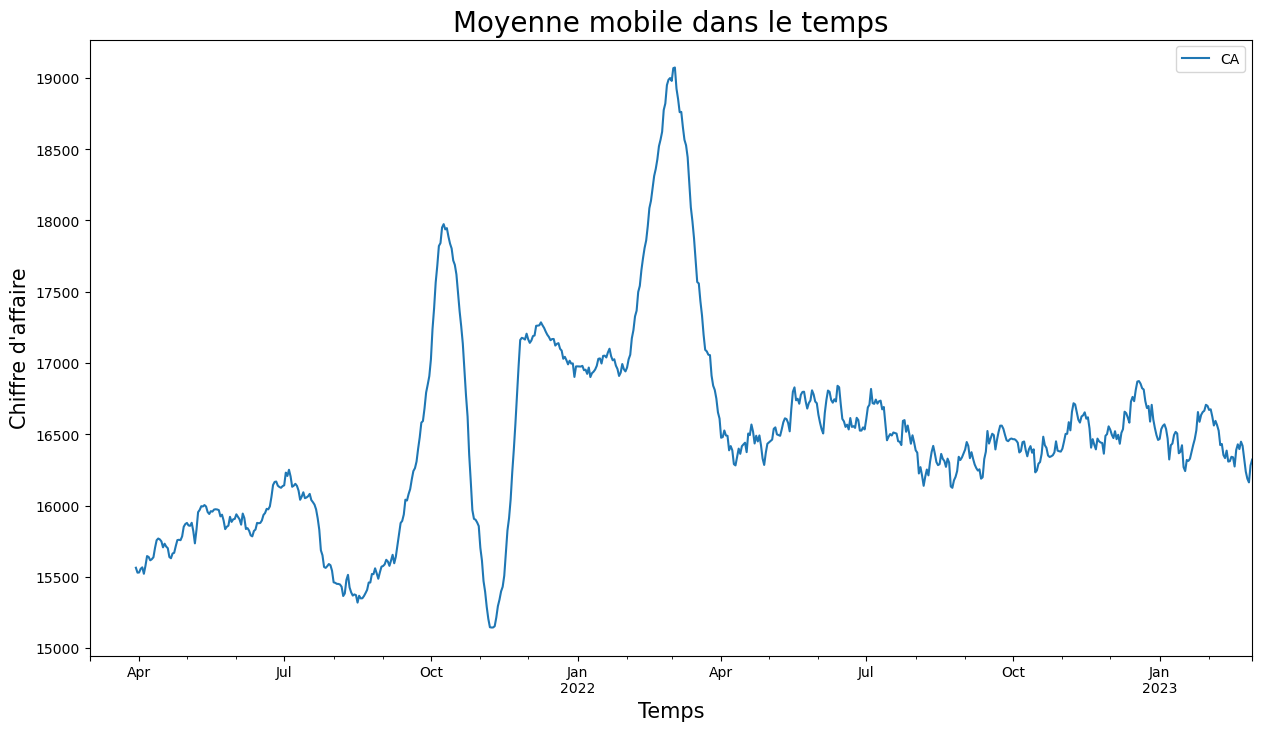

In [147]:
# Graphique moyenne mobile dans le temps 
CAmoymobile.plot.line(y='CA', x = 'date_fmt',figsize=(15, 8))
plt.title("Moyenne mobile dans le temps", size = 20)
plt.ylabel("Chiffre d'affaire", fontsize= 15)
plt.xlabel("Temps", fontsize= 15)
plt.show()

Observations: On peut voir une augmentation du CA au mois de septembre de l'année 2021 (peut-être à cause de la rentrée?)
ainsi qu'une baisse du mois d'octobre au mois de novembre de l'année 2021 puis, une légère augmentation au mois de février de l'année 2022 (les soldes?) Interprétation : saisonalité pic mois d'octobre et février (isoler le mois d'octobre et regarder la catégorie la plus vendue )

Voir s'il y a une tendance ou saisonnalité : non car le pic ne revient pas dans le mois d'octobre suivant 

## Evolution mensuelle du chiffre d'affaires par catégorie 

## Chiffre d'affaire par catégorie

In [148]:
# Transformation de la colonne categ en catégorie 
datamerge2["categ"] = datamerge2["categ"].astype("category")

In [149]:
# Regroupement par catégorie et par prix 
CAcateg = datamerge2.groupby('categ')['price'].sum()
CAcateg = CAcateg.reset_index()

In [150]:
# Code couleur liste
colors = ['#EA7AF4', '#B43E8F', '#6200B3', '#3B0086']

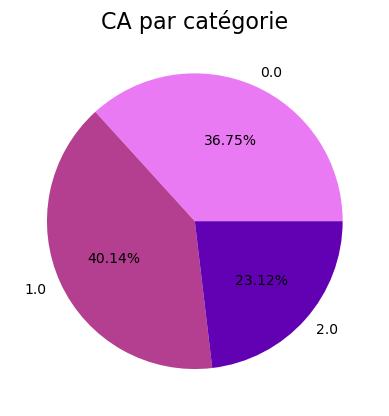

In [151]:
# Création d'un graphique en camembert
plt.pie(x=CAcateg['price'], labels=CAcateg['categ'], colors =colors, autopct='%.2f%%')
plt.title('CA par catégorie', fontsize=16)
plt.show()

La catégorie 1 est la catégorie qui effectue le plus gros chiffre d'affaire avec 40 %
La catégorie 2 est la catégorie qui fait le moins de chiffre d'affaire avec 23%

## Chiffre d'affaire par genre

In [152]:
# Regroupement par sex et par prix
CAgenre = datamerge2.groupby(by=['sex'])['price'].sum().reset_index()

In [153]:
# Renommage de la colonne prix en CA
CAgenre = CAgenre.rename(columns={'price':'CA'})

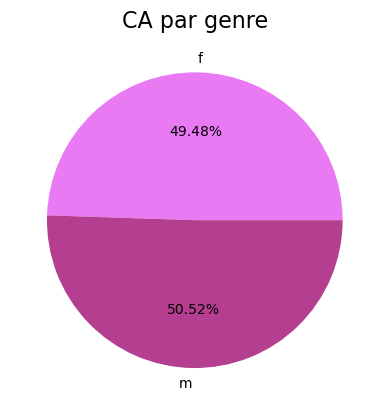

In [154]:
# Création d'un graphique en camembert
plt.pie(x=CAgenre['CA'], labels=CAgenre['sex'], colors =colors, autopct='%.2f%%')
plt.title('CA par genre', fontsize=16)
plt.show()

Les clients sont principalement de sexe masculin mais les deux genre sont représentés de manière équivalente dans le chiffre d'affaire global. Il n'y a donc pas de corrélation entre le genre et le chiffre d'affaire. à confirmer avec test statistiques. 

## Chiffre d'affaire par âge

In [155]:
# Regroupement par âge et par prix dans un nouveau dataframe
ageCA = datamerge2.groupby(by='age')['price'].sum().reset_index()

In [156]:
# Renommage de la colonne prix en CA
ageCA = ageCA.rename(columns={'price':'CA'})

In [157]:
# Création d'une catégorie tranche d'âge
datamerge2['tranche_age'] = pd.qcut(datamerge2['age'], 4)

In [158]:
# Création de nouveaux labels pour les tranches d'âges
new_labels = ['20 à 37 ans', '37 à 44 ans', '44 à 54 ans', '54 à 95 ans']
datamerge2['tranche_age'] = datamerge2['tranche_age'].cat.rename_categories(new_labels)

In [159]:
# Regroupement des prix dans la nouvelle catégorie tranche d'âge 
df_tranche_age = datamerge2.groupby(by='tranche_age')['price'].sum().reset_index().sort_values(by='price',ascending = False)

In [160]:
df_tranche_age

,tranche_age,price
0,20 à 37 ans,4620445.58
3,54 à 95 ans,2759035.47
2,44 à 54 ans,2428434.38
1,37 à 44 ans,2219747.67


In [161]:
tranche_age = list(df_tranche_age['tranche_age'])

In [162]:
tranche_age

['20 à 37 ans', '54 à 95 ans', '44 à 54 ans', '37 à 44 ans']

In [163]:
CA = list(df_tranche_age['price'])

In [164]:
CA

[4620445.58, 2759035.4699999997, 2428434.38, 2219747.67]

<BarContainer object of 4 artists>

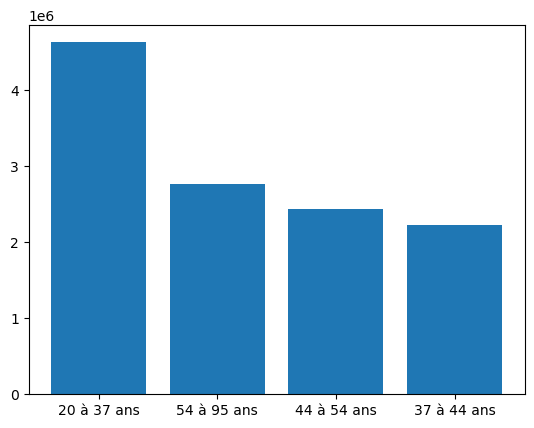

In [165]:
plt.bar(tranche_age, CA)

Observations : La tranche d'âge qui fait le plus de chiffre d'affaire est la catégorie des 20-37 ans et celle qui fait le moins de chiffre d'affaire est celle des 37 à 44 ans.

## Boxplot distribution de la valeur de prix 

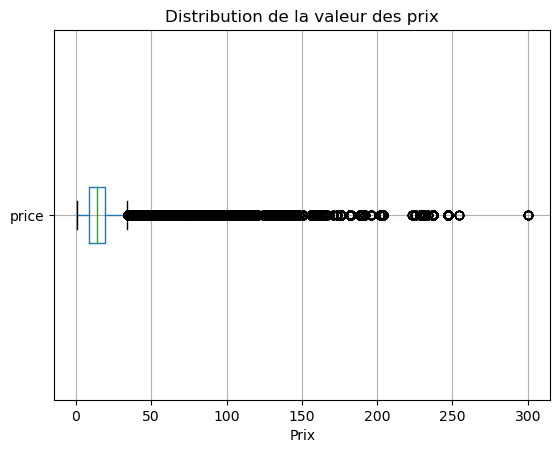

In [166]:
datamerge2.boxplot(column='price', vert=False)
plt.title('Distribution de la valeur des prix')
plt.xlabel('Prix')
plt.show()

Observations : On peut remarquer que plus le prix est elevé, moins il y a d'achats. 

In [167]:
# Calcul de la moyenne 
moyenne = np.mean(datamerge2['price'])
print ("La moyenne de prix est de : ", round(moyenne, 2))

La moyenne de prix est de :  17.49


In [168]:
# Calcul de la mediane
mediane = np.median(datamerge2['price'])
print ("La mediane des prix est de : ", round(mediane, 2))

La mediane des prix est de :  13.99


In [169]:
# Calcul de l'interquartile
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(datamerge2['price'], 25))
print("Quartile Q1 vaut : ", round(np.percentile(datamerge2['price'], 25)))
 
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(datamerge2['price'], 75))
print("Quartile Q3 vaut : ", round(np.percentile(datamerge2['price'], 75)))
 
# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q1 vaut :  9
Quartile Q3 vaut :  19
L ecart interquartile vaut :  10


50 % des produits ont un prix compris entre 9 euros et 19 euros 

## Analyse top et flop des produits (10 produits les plus vendus et moins vendus )

In [170]:
# Chiffre d'affaire par produits
CAprod = datamerge2.groupby(by=['id_prod'])['price'].sum().reset_index()
CAprod = CAprod.rename(columns={'price':'CA'})
print("Liste des produits et chiffre d'affaire effectif :")
CAprod

Liste des produits et chiffre d'affaire effectif :


,id_prod,CA
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3260,2_95,395.96
3261,2_96,28650.18
3262,2_97,2092.87
3263,2_98,149.74


In [171]:
# Top 10 produits triés par valeur CA
CAprod.sort_values(by=["CA"], ascending=False).head(10)

,id_prod,CA
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86
2619,1_395,56617.47
2591,1_369,56136.60
3043,2_110,53846.25
2607,1_383,53834.43
2641,1_414,53522.18


In [172]:
# Top 10 produits les moins vendus trés par valeurs CA
CAprod.sort_values(by=["CA"], ascending=True).head(10)

,id_prod,CA
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1784,0_541,1.99
665,0_1601,1.99
2079,0_807,1.99
802,0_1728,2.27
549,0_1498,2.48
2179,0_898,2.54
925,0_1840,2.56


## Prix moyen par catégorie

In [173]:
# Regroupement par catégorie et par prix 
MoyPrixCateg = datamerge2.groupby('categ')['price'].mean()

In [174]:
print(MoyPrixCateg)

categ
0.0    10.638188
1.0    20.491600
2.0    76.207412
Name: price, dtype: float64


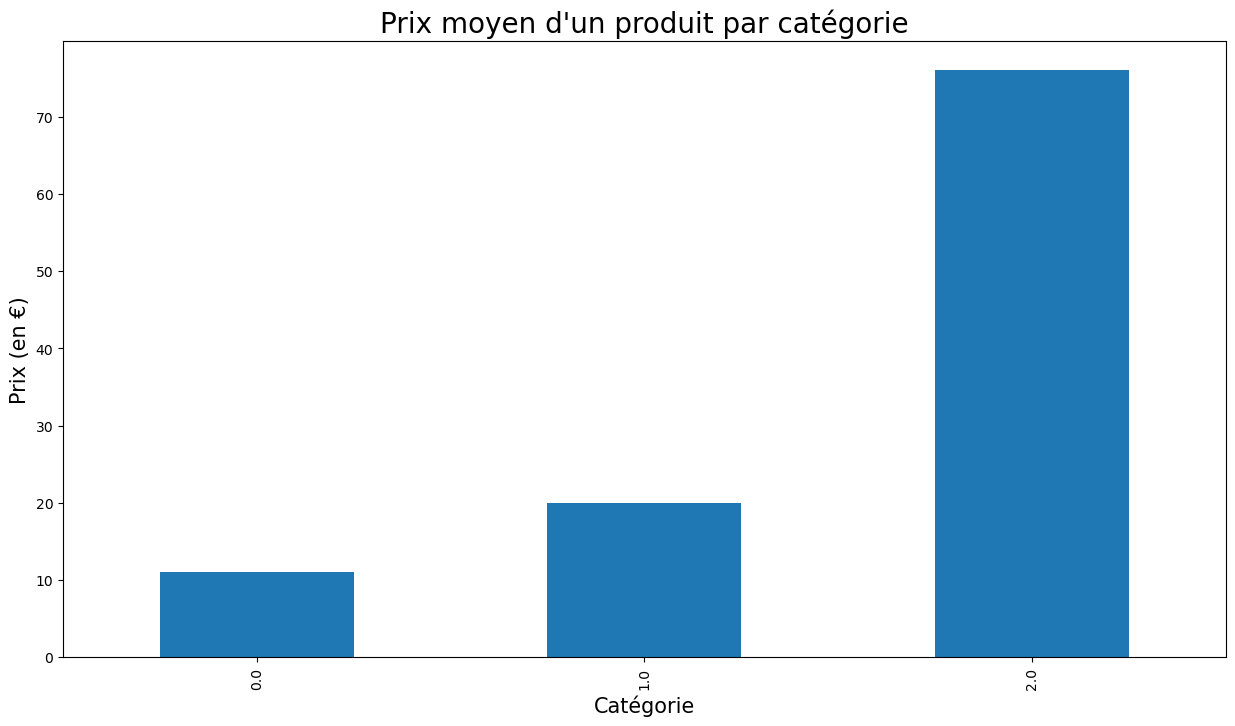

In [175]:
round(MoyPrixCateg).plot.bar(x='categ', y='price', figsize=(15, 8))
plt.title("Prix moyen d'un produit par catégorie", size = 20)
plt.ylabel("Prix (en €)", size = 15)
plt.xlabel("Catégorie", size = 15)
plt.show()

Observation : Le prix moyen des produits par catégorie est de 11 euros pour la catégorie 1, 20 euros pour la catégorie 2 et 76 euros pour la catégorie 3. On voit qu'il y aun écart de prix énorme entre la catégorie 1 et 2. La catégorie 2 doit moins bien se vendre car c'est la catégorie la plus chère. 

## Répartition du chiffre d'affaire et courbe de Lorenz

In [176]:
# Trace la courbe de Lorenz chiffre d'affaires/clients
CA_repartition =datamerge2.groupby('client_id', as_index=False)['price'].sum()

In [177]:
CA_repartition = CA_repartition.rename(columns={'price':'CA'})

In [178]:
CA_repartition.sort_values(by=["CA"], ascending=False)

,client_id,CA
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153918.60
2724,c_3454,114110.57
634,c_1570,5285.82
...,...,...
3855,c_4478,13.36
4044,c_4648,11.20
7889,c_8114,9.98
7918,c_8140,8.30


In [179]:
# Courbe de Lorenz
dep = CA_repartition["CA"].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)

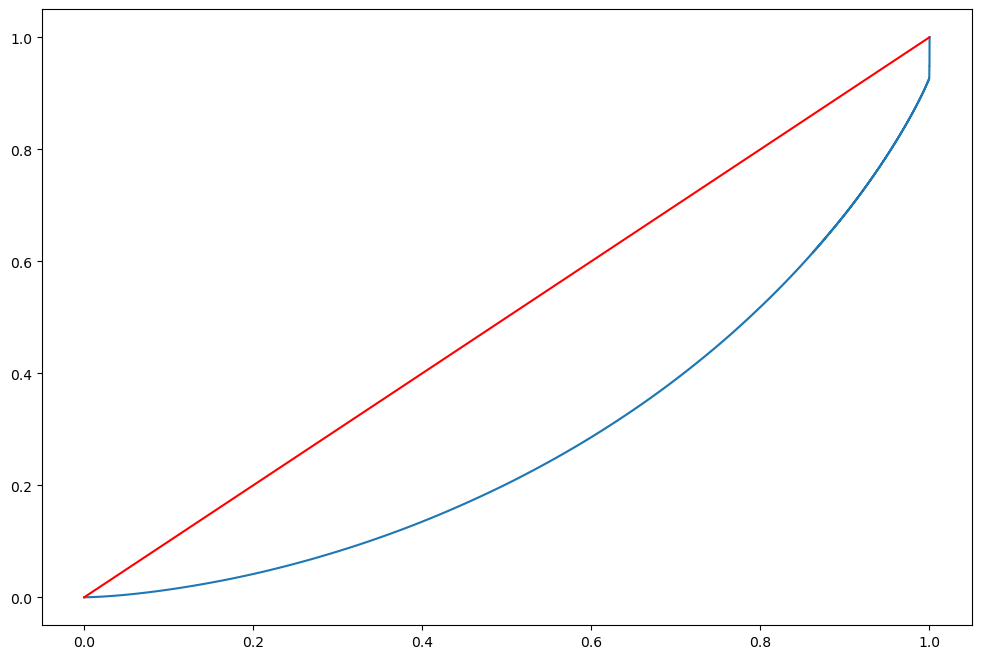

In [180]:
# Courbe de Lorenz

plt.figure (figsize= (12,8))
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = 'solid',label="Courbe d'égalité parfaite")

plt.show()

In [181]:
#Indice de gini

n = len(lorenz)

AUC = (lorenz.sum()-lorenz[-1])/n 

# S est la surface entre la première bissectrice et le courbe de Lorenz

S = 0.5 - AUC 

# Définition de l'indicateur de Gini

gini = (2*S).round(3)

print(f"L'indice de Gini est égal à {gini}")

L'indice de Gini est égal à 0.442


On peut voir qu'il y a une répartition inégalitaire du chiffre d'affaire au niveau des clients car l'indice se rapproche de 1. 

In [182]:
# Groupe de clients qui font le plus de CA:
CA_client = datamerge2.groupby(["client_id"])["price"].sum().nlargest(10)
CA_client

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64

Text(0.5, 1.0, 'Clients qui font le plus de CA')

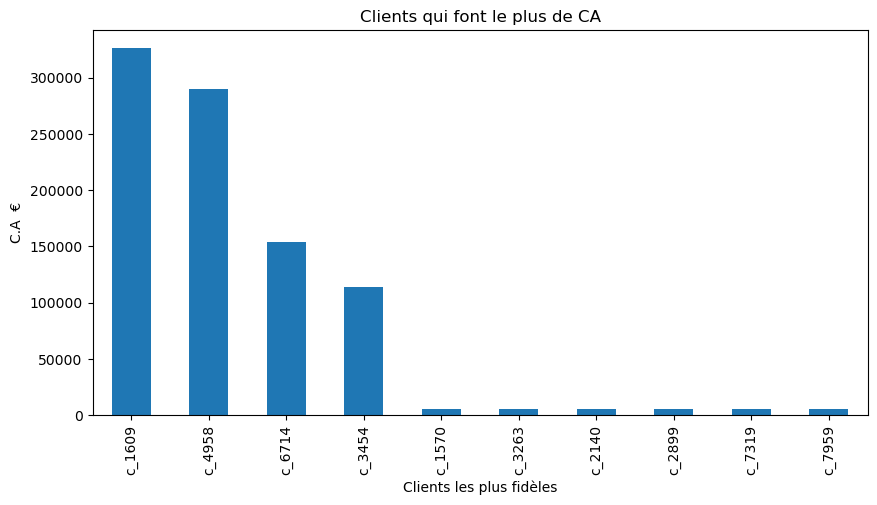

In [183]:
# Clients qui font le plus de CA :

plt.figure(figsize = (10,5))
CA_client.plot.bar(x='client_id', y='price')
plt.xlabel('Clients les plus fidèles')
plt.ylabel('C.A  €')

plt.title('Clients qui font le plus de CA')

On peut voir que la majorité du CA est fait par 4 clients (clients professionnels BTOB)

In [184]:
#Supprimer les clients BTOB car personne morale on ne peut pas mettre de genre dessus (peut biaisier les analyses)
# Les 4 clients btb
cli_btb = datamerge2[(datamerge2.client_id== 'c_1609')|(datamerge2.client_id=='c_4958')|(datamerge2.client_id=='c_6714')|(datamerge2.client_id=='c_3454')]
cli_btb


,client_id,sex,birth,id_prod,price,categ,date,session_id,date_str,date_fmt,age,tranche_age
102973,c_4958,m,1999,1_587,4.99,1.0,2021-11-17 18:53:48.958205,s_121110,2021-11-17,2021-11-17,25,20 à 37 ans
102974,c_4958,m,1999,1_587,4.99,1.0,2022-04-17 18:53:48.958205,s_195468,2022-04-17,2022-04-17,25,20 à 37 ans
102975,c_4958,m,1999,1_587,4.99,1.0,2022-08-17 18:53:48.958205,s_254678,2022-08-17,2022-08-17,25,20 à 37 ans
102976,c_4958,m,1999,1_587,4.99,1.0,2022-10-17 18:53:48.958205,s_283920,2022-10-17,2022-10-17,25,20 à 37 ans
102977,c_4958,m,1999,2_228,225.17,2.0,2021-03-20 18:30:57.991560,s_9092,2021-03-20,2021-03-20,25,20 à 37 ans
...,...,...,...,...,...,...,...,...,...,...,...,...
648432,c_3454,m,1969,1_651,18.99,1.0,2022-05-14 07:01:23.027009,s_208255,2022-05-14,2022-05-14,55,54 à 95 ans
648433,c_3454,m,1969,1_651,18.99,1.0,2022-08-25 14:43:08.578786,s_258288,2022-08-25,2022-08-25,55,54 à 95 ans
648434,c_3454,m,1969,0_2001,7.99,0.0,2022-01-16 14:26:31.241993,s_150684,2022-01-16,2022-01-16,55,54 à 95 ans
648435,c_3454,m,1969,1_387,9.99,1.0,2021-11-14 06:58:26.437656,s_119415,2021-11-14,2021-11-14,55,54 à 95 ans


In [185]:
#Dataframe sans les 4 gros clients btob
dtf_final = datamerge2.drop(cli_btb.index).reset_index(drop=True)
dtf_final

,client_id,sex,birth,id_prod,price,categ,date,session_id,date_str,date_fmt,age,tranche_age
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,2021-03-22,2021-03-22,57,54 à 95 ans
1,c_4410,f,1967,1_385,25.99,1.0,2023-02-22 01:40:22.782925,s_345108,2023-02-22,2023-02-22,57,54 à 95 ans
2,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,2021-11-04,2021-11-04,57,54 à 95 ans
3,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,2021-03-22,2021-03-22,57,54 à 95 ans
4,c_4410,f,1967,0_1111,19.99,0.0,2023-02-22 01:27:49.480137,s_345108,2023-02-22,2023-02-22,57,54 à 95 ans
...,...,...,...,...,...,...,...,...,...,...,...,...
640729,c_84,f,1982,0_1438,9.31,0.0,2022-03-29 06:11:50.316631,s_186172,2022-03-29,2022-03-29,42,37 à 44 ans
640730,c_84,f,1982,0_1438,9.31,0.0,2022-05-29 06:11:50.316631,s_215697,2022-05-29,2022-05-29,42,37 à 44 ans
640731,c_84,f,1982,1_459,15.99,1.0,2022-02-17 00:16:56.629536,s_166337,2022-02-17,2022-02-17,42,37 à 44 ans
640732,c_84,f,1982,1_459,15.99,1.0,2022-12-17 00:16:56.629536,s_313173,2022-12-17,2022-12-17,42,37 à 44 ans


## Demandes de Julie


### Corrélation entre le genre d'un client et les catégories de livres achetés

In [186]:
#CA par genre et categorie (transactions) 
genre_categca = dtf_final.pivot_table(index='sex', columns='categ', values='price', aggfunc='count')
genre_categca

categ,0.0,1.0,2.0
sex,,,
f,200793,115721,16980
m,186488,104884,15868


Observations : la catégorie 0 est la plus vendue pour les deux sexes suivie de la categorie 2 et enfin de la catégorie 1. 

In [187]:
(chi2, p, dof, excptd) = chi2_contingency(genre_categca)

In [188]:
print(f"la valeur de la p-value est : {p}")

la valeur de la p-value est : 1.1955928116587024e-05


H0 = il n'y a pas de lien entre la catégorie de livre et le genre du client 

H1(hypothèse alternative)= il y a une corréalation entre la catégorie de livre et le genre du client 

p-value est inférieur à 0,05.

L'hypothèse nulle est rejetée, il y'a une corrélation entre le genre et la categorie des achats. 


In [189]:
#Indentification de l'intensité de la corrélation entre les deux variables à travers la valeur du v de cramer 
V = np.sqrt(chi2/n*dof)

In [190]:
print(f"la valeur de la V de Cramer est : {V}")

la valeur de la V de Cramer est : 0.07260266360415747


 Rappel sur l'interprétation du coefficient de Cramer
 
 < 0,10 = La relation est nulle ou faible.

. > = 0,10 et < 0,20 = La relation est faible.

. > = 0,20 et < 0,30 = La relation est moyennne.

. > = 0,30 = La relation est forte.

La corrélation entre les deux variables catégorie et genre est faible 

### Corrélation entre l'âge des clients et le montant total des achats

Text(0.5, 1.0, 'Montant des achats par âges')

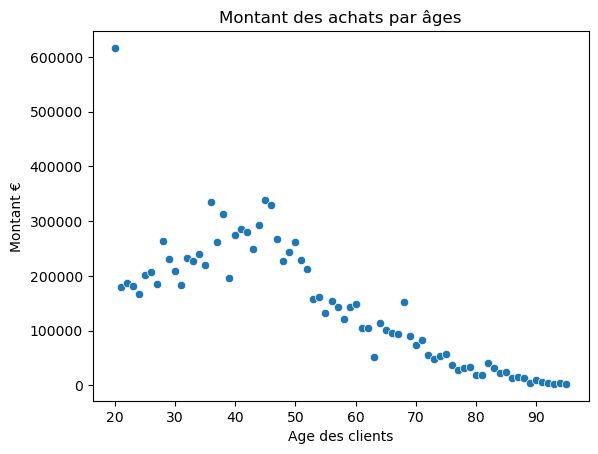

In [191]:
#Montant des achats par âge
achats_age = dtf_final.groupby(['age'])['price'].sum()

sns.scatterplot(data= achats_age)
plt.ylabel('Montant €')
plt.xlabel('Age des clients')
plt.title('Montant des achats par âges')

In [194]:
achats_age2 = achats_age.reset_index()

In [195]:
achats_age2

,age,price
0,20,616418.15
1,21,180680.89
2,22,186791.83
3,23,181233.57
4,24,167388.08
...,...,...
71,91,5477.83
72,92,5059.18
73,93,2815.45
74,94,4251.22


In [196]:
#Test de la normalité de la variable âge Kolmogorov et Smirnoff
stat, p_value = sp.stats.kstest(achats_age2['age'],'norm')
print("Statistique de test :", stat)
print("p-value :", p_value)

Statistique de test : 1.0
p-value : 0.0


In [197]:
#Test de la normalité de la variable price Kolmogorov et Smirnoff
stat, p_value = sp.stats.kstest(achats_age2['price'],'norm')
print("Statistique de test :", stat)
print("p-value :", p_value)

Statistique de test : 1.0
p-value : 0.0


Les variables price et âge ne suivent de pas de loi normale car la p.value est inférieur à 0.05

In [199]:
#Test de Spearman
corr, p_value = sp.stats.spearmanr(achats_age2['age'],achats_age2['price'])

In [200]:
corr

-0.8744497607655503

observations : Corrélation négative qui se rapproche de 1. Comportement de groupe entre les personne du même âge. Plus l'âge avance plus les clients font moins de chiffre d'affaire. 

### Corrélation entre l'âge des clients et la fréquence d'achat

Text(0.5, 1.0, 'Fréquence d’achat par âges')

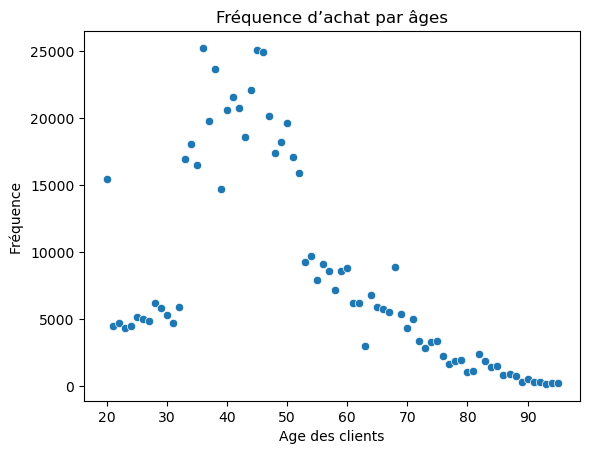

In [201]:
#Fréquence des achats par âge
nb_achats = dtf_final.groupby(['age'])['session_id'].count()
sns.scatterplot(data= nb_achats)
plt.ylabel('Fréquence ')
plt.xlabel('Age des clients')
plt.title('Fréquence d’achat par âges')

In [202]:
nb_achats = nb_achats.reset_index()

In [203]:
nb_achats = nb_achats.rename(columns= {'session_id':'frequence_achat'})

In [204]:
#Test de normalité de la fréquence d'achat
stat, p_value = sp.stats.kstest(nb_achats['frequence_achat'],'norm')
print("Statistique de test :", stat)
print("p-value :", p_value)

Statistique de test : 1.0
p-value : 0.0


In [205]:
#Test de spearman
corr_age_freq, p_value = sp.stats.spearmanr(nb_achats['age'], nb_achats['frequence_achat'])

In [206]:
corr_age_freq

-0.6756527682843472

Observations : Plus les clients sont âgés moins ils font d'achat. Corrélation négative. 

### Corrélation entre l'âge des clients et la taille du panier moyen

In [235]:
#Taille du panier moyen et les catégories des livres achetés

taille_panier = datamerge2.groupby(['age','session_id'])["price"].sum().reset_index()
taille_panier = taille_panier.rename(columns={'price':'panier_moyen'})

panier_moyen = taille_panier.groupby(['age'])["panier_moyen"].mean().reset_index()
panier_moyen

,age,panier_moyen
0,20,70.399515
1,21,69.094031
2,22,70.064452
3,23,72.843075
4,24,67.604233
...,...,...
71,91,23.113207
72,92,24.440483
73,93,29.327604
74,94,28.153775


In [225]:
stat, p_value = sp.stats.kstest(panier_moyen['panier_moyen'],'norm')
print("Statistique de test :", stat)
print("p-value :", p_value)

Statistique de test : 1.0
p-value : 0.0


In [226]:
stat, p_value = sp.stats.kstest(panier_moyen['age'],'norm')
print("Statistique de test :", stat)
print("p-value :", p_value)

Statistique de test : 1.0
p-value : 0.0


In [237]:
#Test de spearman
corr_panier_moyen, p_value = sp.stats.spearmanr(panier_moyen['age'], panier_moyen['panier_moyen'])

In [238]:
corr_panier_moyen

-0.7746001367053998

### Corrélation entre l'âge du clients et la catégorie des livres achetés

In [209]:
#Age et categorie
age_categ = datamerge2.groupby(['categ'])['age'].mean().reset_index()
age_categ

,categ,age
0,0.0,45.897446
1,1.0,49.509232
2,2.0,27.948031


In [210]:
datamerge2.head()

,client_id,sex,birth,id_prod,price,categ,date,session_id,date_str,date_fmt,age,tranche_age
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,2021-03-22,2021-03-22,57,54 à 95 ans
1,c_4410,f,1967,1_385,25.99,1.0,2023-02-22 01:40:22.782925,s_345108,2023-02-22,2023-02-22,57,54 à 95 ans
2,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,2021-11-04,2021-11-04,57,54 à 95 ans
3,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,2021-03-22,2021-03-22,57,54 à 95 ans
4,c_4410,f,1967,0_1111,19.99,0.0,2023-02-22 01:27:49.480137,s_345108,2023-02-22,2023-02-22,57,54 à 95 ans


In [211]:
#Test de la normalité de la variable âge Kolmogorov et Smirnoff
stat_age, p_value_age = sp.stats.kstest(datamerge2['age'],'norm')
print("Statistique de test :", stat_age)
print("p-value_age :", p_value_age)

Statistique de test : 1.0
p-value_age : 0.0


Hypothèse nulle car p.value est inférieure à 0.05

In [212]:
#Création de catégorie pour le test de kruskall wallis

catg0_age = datamerge2[datamerge2['categ']==0.0]

In [213]:
catg1_age = datamerge2[datamerge2['categ']==1.0]

In [214]:
catg2_age = datamerge2[datamerge2['categ']==2.0]

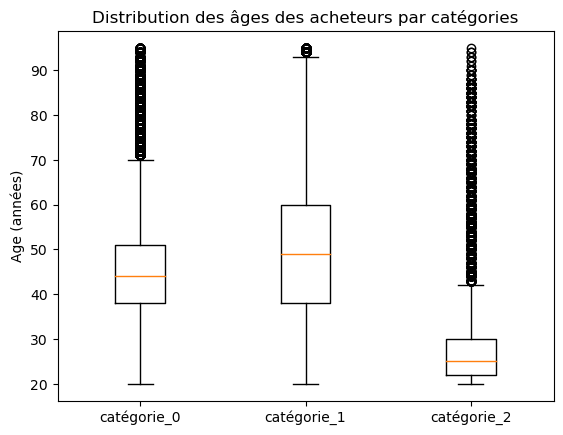

In [219]:
# Graphique:
plt.boxplot([catg0_age[catg0_age['categ'] == 0.0]['age'],
  catg1_age[catg1_age['categ'] == 1.0]['age'],
  catg2_age[catg2_age['categ'] == 2.0]['age']], labels = ["catégorie_0","catégorie_1","catégorie_2"])
plt.ylabel("Age (années)")
plt.title("Distribution des âges des acheteurs par catégories")
plt.show()

In [221]:
#Test de Kruskall Wallis si la variable ne suit pas une loi normale 
statistic, p_value_age = sp.stats.kruskal(catg0_age['age'],catg1_age['age'],catg2_age['age'])
print("Statistique de test :", statistic)
print("p-value :", p_value)

Statistique de test : 78458.43837285662
p-value : 2.1466320003455262e-11


Conclusion/Recommandation : 

p_value inférieure à 0.05  : Il y a une différence significative entre les âges des acheteurs de chaque catégories. Il y a un lien entre l'âge du client et des catégories qu'il achète. 

Plan d'action marketing : fidélisation client tranche d'âge 30-40, mettre en place des plans d'actions pour faire venir les personnes âgées en boutique (Dédicace auteurs, ateliers pour les séniors...)